In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('flight_delay_predictions.csv')
df

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,Predictions
0,1,12,814,UA,134,0,0,679,0
1,1,12,830,DL,90,0,0,214,0
2,1,1,1835,UA,213,0,0,1605,1
3,1,4,1730,AA,80,0,0,235,1
4,1,7,1442,UA,103,0,0,413,1
...,...,...,...,...,...,...,...,...,...
5995,0,6,1725,AA,115,17,30,597,1
5996,0,9,1945,DL,127,-19,-9,752,0
5997,0,8,1850,DL,101,6,-4,481,0
5998,0,7,1720,AA,210,178,42,1302,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Canceled          6000 non-null   int64 
 1   Month             6000 non-null   int64 
 2   DepartureTime     6000 non-null   int64 
 3   UniqueCarrier     6000 non-null   object
 4   SchedElapsedTime  6000 non-null   int64 
 5   ArrDelay          6000 non-null   int64 
 6   DepDelay          6000 non-null   int64 
 7   Distance          6000 non-null   int64 
 8   Predictions       6000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 422.0+ KB


In [10]:
df.isnull().sum()

Canceled            0
Month               0
DepartureTime       0
UniqueCarrier       0
SchedElapsedTime    0
ArrDelay            0
DepDelay            0
Distance            0
Predictions         0
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Length: 6000, dtype: bool

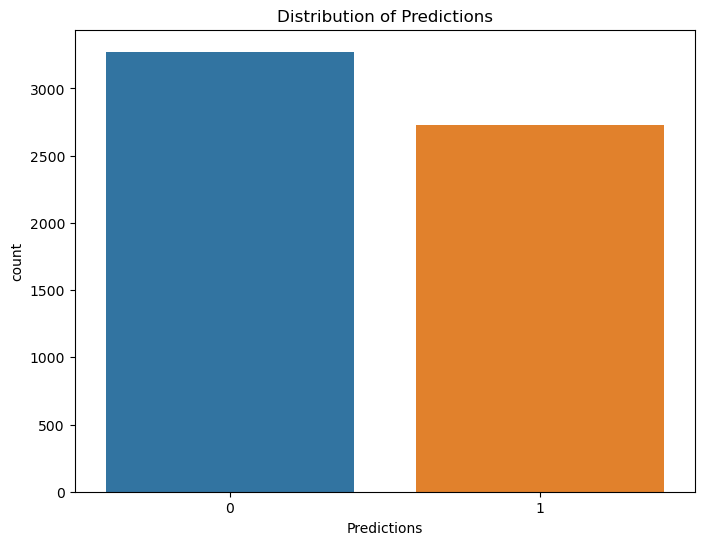

In [43]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Predictions', data=df)
plt.title('Distribution of Predictions')
plt.show()

<Figure size 1200x800 with 0 Axes>

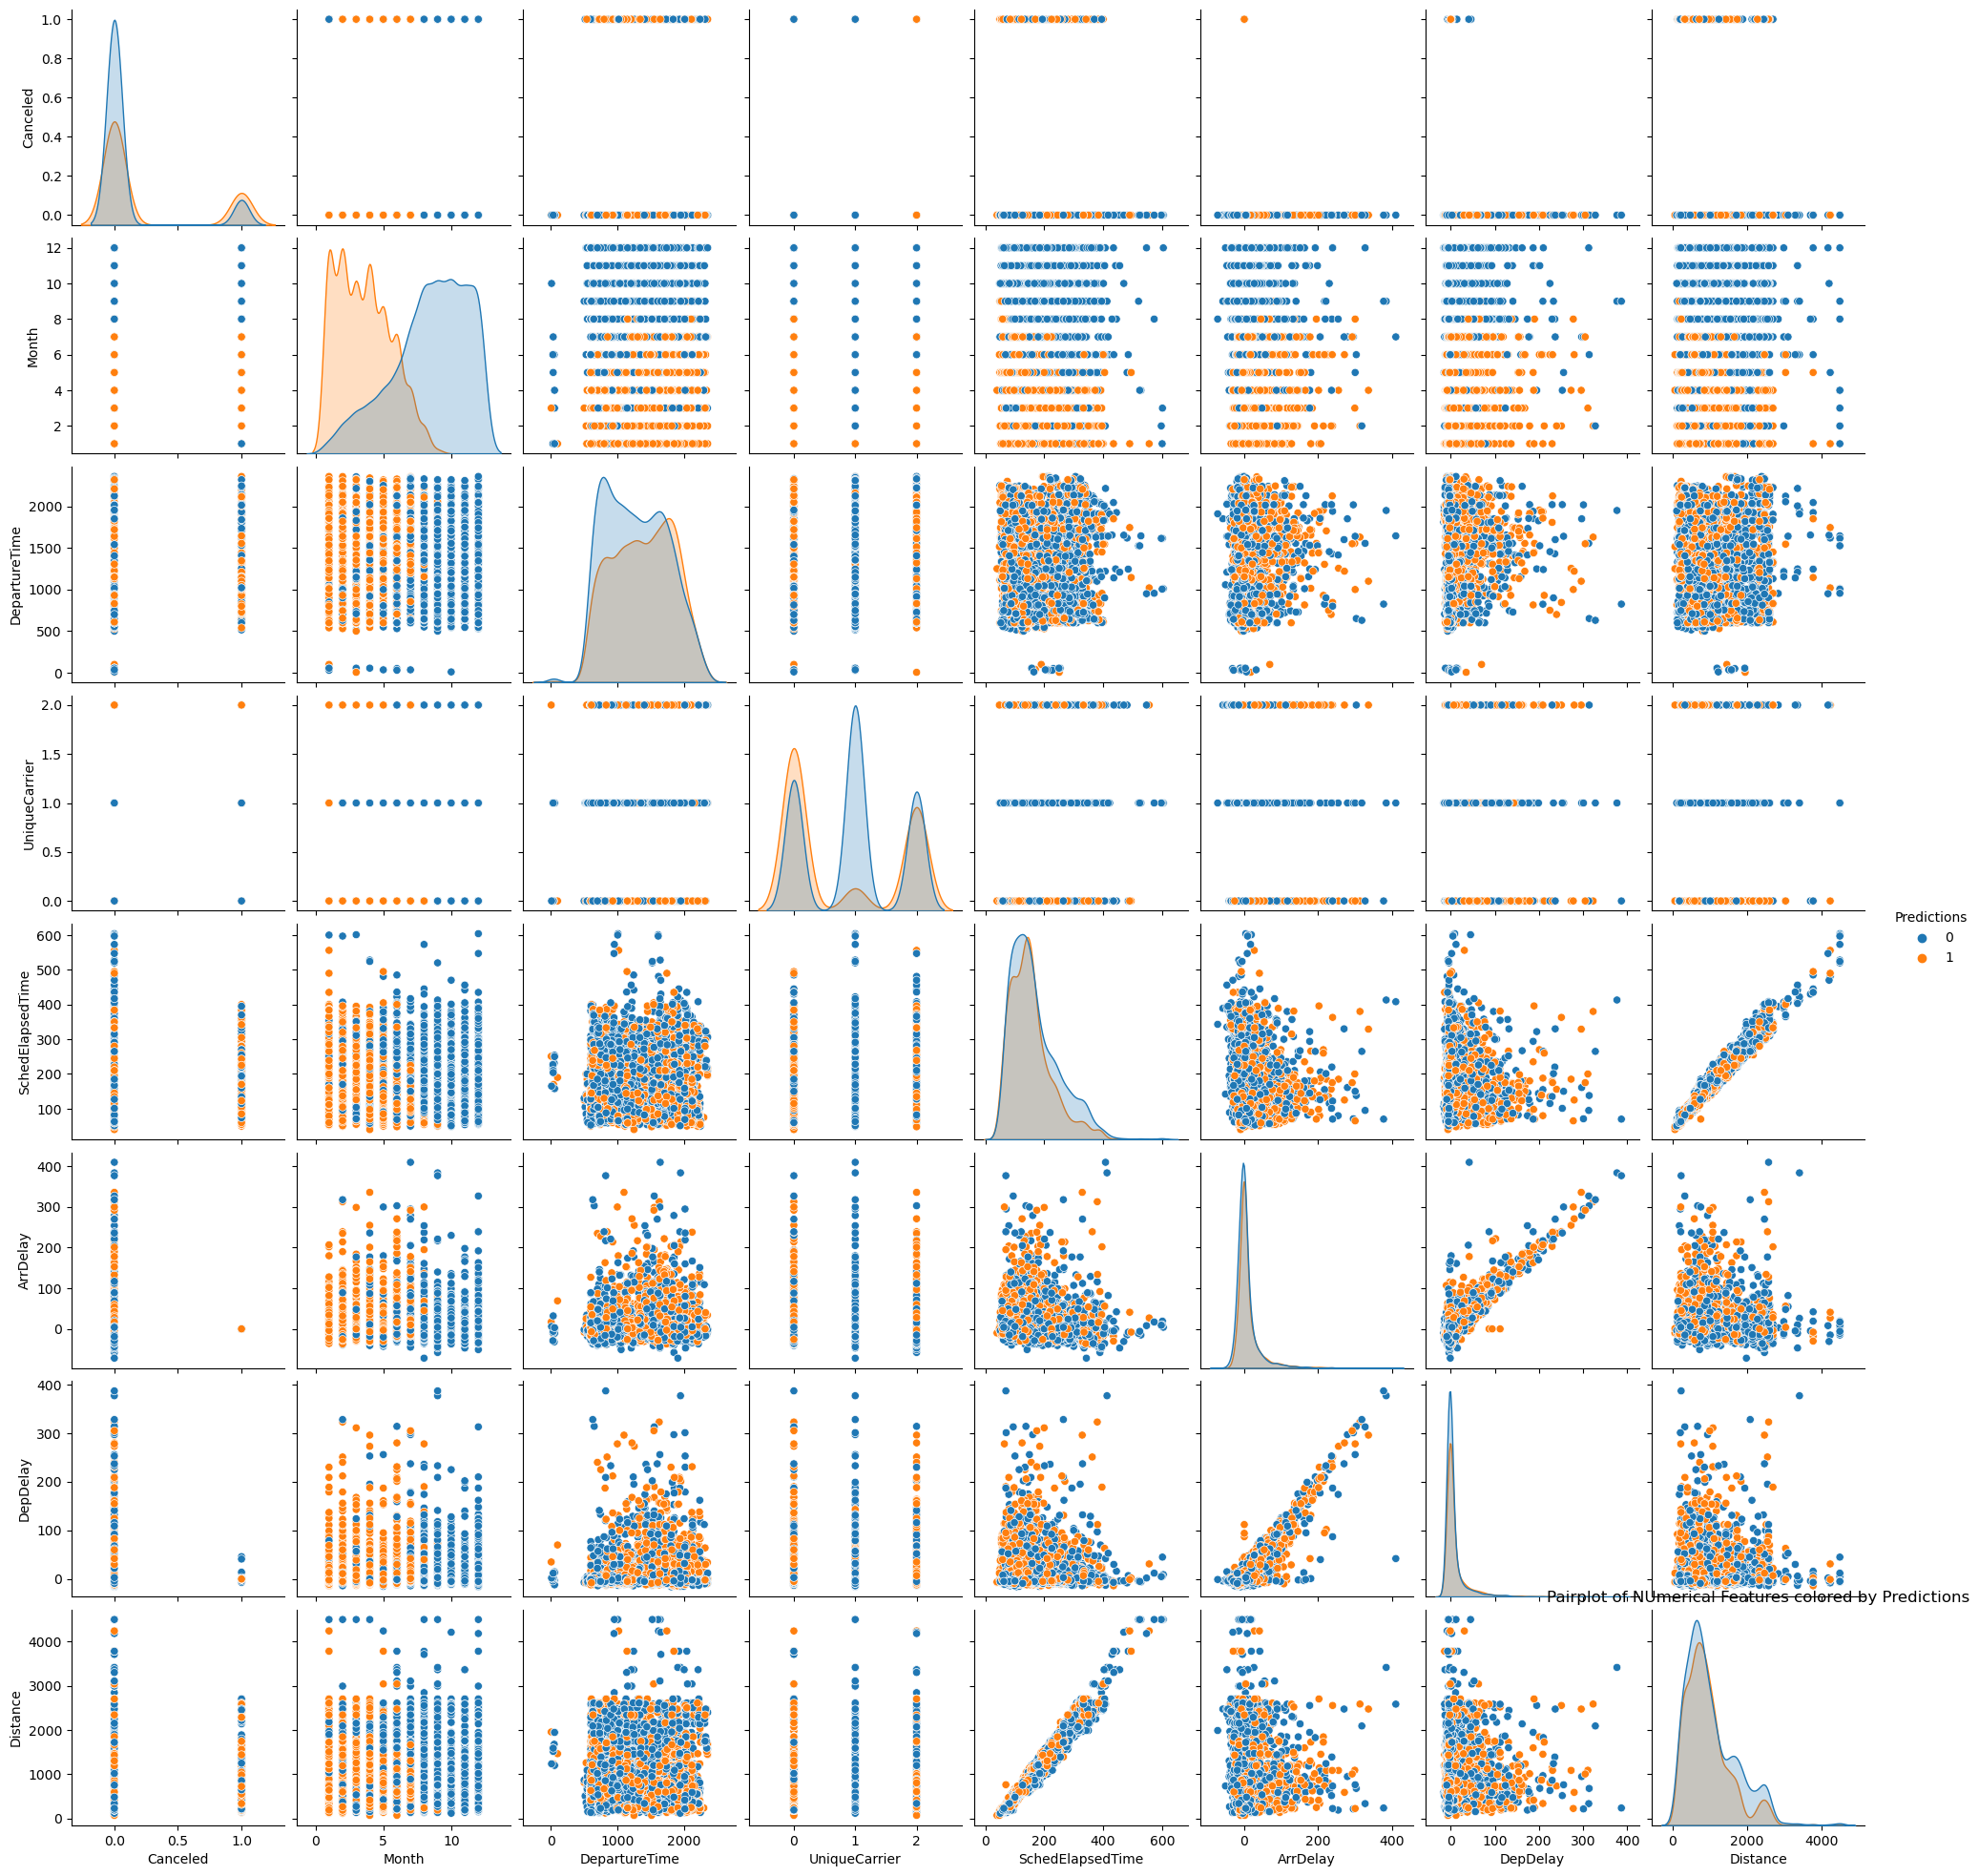

In [44]:
# Visualize relationships between numerical features and the target variable
plt.figure(figsize=(12, 8))
sns.pairplot(data=df, hue='Predictions')
plt.title('Pairplot of NUmerical Features colored by Predictions')
plt.show()

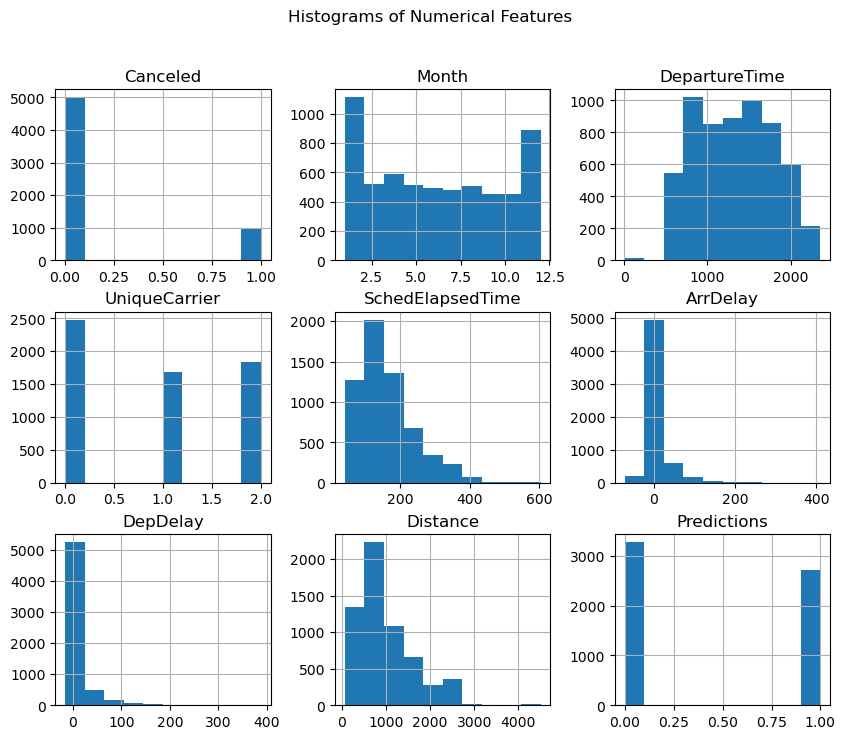

In [45]:
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

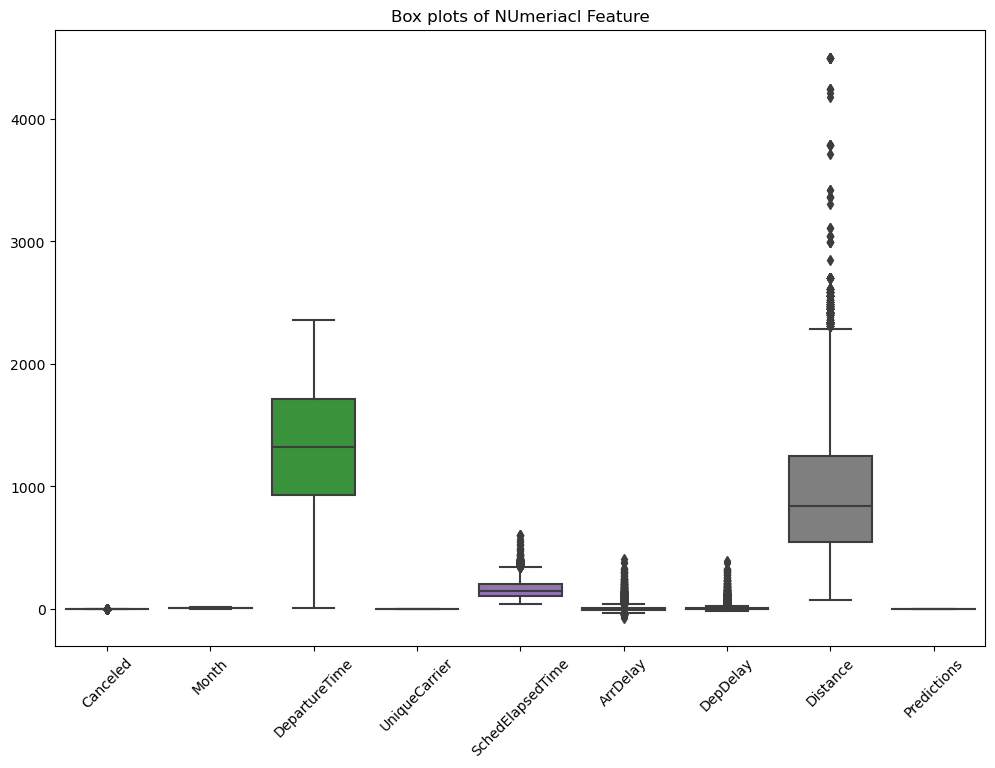

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Box plots of NUmeriacl Feature")
plt.xticks(rotation=45)
plt.show()

In [15]:
lab_encod = LabelEncoder()
df['UniqueCarrier'] = lab_encod.fit_transform(df['UniqueCarrier'])
df

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance,Predictions
0,1,12,814,2,134,0,0,679,0
1,1,12,830,1,90,0,0,214,0
2,1,1,1835,2,213,0,0,1605,1
3,1,4,1730,0,80,0,0,235,1
4,1,7,1442,2,103,0,0,413,1
...,...,...,...,...,...,...,...,...,...
5995,0,6,1725,0,115,17,30,597,1
5996,0,9,1945,1,127,-19,-9,752,0
5997,0,8,1850,1,101,6,-4,481,0
5998,0,7,1720,0,210,178,42,1302,1


In [20]:
X = df.drop('Predictions', axis = 1)
y = df['Predictions']
X

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,2,134,0,0,679
1,1,12,830,1,90,0,0,214
2,1,1,1835,2,213,0,0,1605
3,1,4,1730,0,80,0,0,235
4,1,7,1442,2,103,0,0,413
...,...,...,...,...,...,...,...,...
5995,0,6,1725,0,115,17,30,597
5996,0,9,1945,1,127,-19,-9,752
5997,0,8,1850,1,101,6,-4,481
5998,0,7,1720,0,210,178,42,1302


In [22]:
y

0       0
1       0
2       1
3       1
4       1
       ..
5995    1
5996    0
5997    0
5998    1
5999    0
Name: Predictions, Length: 6000, dtype: int64

In [28]:
scale = StandardScaler()
X = scale.fit_transform(X)
X

array([[ 2.23606798,  1.68212128, -1.12500333, ..., -0.22687263,
        -0.28891059, -0.4772388 ],
       [ 2.23606798,  1.68212128, -1.09015102, ..., -0.22687263,
        -0.28891059, -1.1963706 ],
       [ 2.23606798, -1.5192399 ,  1.09901004, ..., -0.22687263,
        -0.28891059,  0.95483872],
       ...,
       [-0.4472136 ,  0.51798994,  1.13168409, ..., -0.05908811,
        -0.4152264 , -0.78344976],
       [-0.4472136 ,  0.22695711,  0.84850903, ...,  4.75073467,
         1.03740549,  0.48624316],
       [-0.4472136 ,  0.80902278,  1.36040241, ..., -0.11501629,
        -0.19417373,  1.13423504]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)
X_train

array([[-0.4472136 ,  1.68212128,  0.21898908, ..., -0.33872897,
        -0.47838431, -1.02316036],
       [-0.4472136 , -1.22820707,  0.89207442, ..., -0.22687263,
        -0.3520685 ,  0.69966292],
       [-0.4472136 ,  1.10005561,  1.45842454, ..., -0.98190295,
        -0.4152264 , -0.55301828],
       ...,
       [-0.4472136 ,  1.68212128,  0.19502811, ...,  1.03151124,
         1.29003712, -0.21896996],
       [-0.4472136 , -1.5192399 , -1.04658562, ..., -0.11501629,
        -0.4152264 ,  0.39345196],
       [ 2.23606798, -0.6461414 ,  0.43463778, ..., -0.22687263,
        -0.28891059, -0.01482932]])

In [32]:
X_test

array([[-0.4472136 , -0.35510856, -1.15549911, ..., -0.59040575,
        -0.4152264 ,  0.02692672],
       [-0.4472136 ,  1.68212128,  1.15128852, ...,  4.24738112,
         3.69003763, -0.47569228],
       [ 2.23606798, -0.6461414 , -0.83965   , ..., -0.22687263,
        -0.28891059, -0.90407832],
       ...,
       [-0.4472136 , -1.22820707,  1.11207966, ..., -0.42262123,
        -0.16259477, -1.1190446 ],
       [-0.4472136 , -0.06407573, -0.65449708, ..., -0.78615435,
        -0.3520685 ,  1.81006428],
       [-0.4472136 ,  0.22695711, -0.24062583, ..., -0.31076489,
        -0.32048954, -0.90407832]])

In [34]:
y_train

3897    0
5628    1
1756    0
2346    0
2996    0
       ..
3772    0
5191    1
5226    0
5390    1
860     1
Name: Predictions, Length: 4800, dtype: int64

In [36]:
y_test

1782    1
3917    0
221     1
2135    0
5224    0
       ..
2543    0
1773    0
2846    1
5799    0
1765    1
Name: Predictions, Length: 1200, dtype: int64

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:\n",accuracy,
     "\nConfusion Matrix:\n",cm)

Accuracy:
 0.9775 
Confusion Matrix:
 [[659  14]
 [ 13 514]]


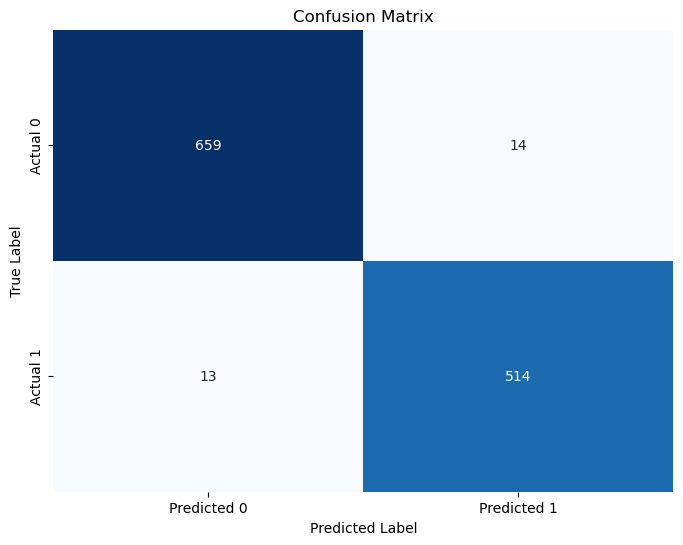

In [62]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Train and evaluate LogisticRegression
lr_cls = LogisticRegression(max_iter=1000)
lr_cls.fit(X_train, y_train)
lr_pred = lr_cls.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

In [68]:
lr_accuracy

0.84

In [72]:
svm_classifier = SVC(kernel ='linear')
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accu = accuracy_score(y_test, svm_pred)
svm_accu

0.8525

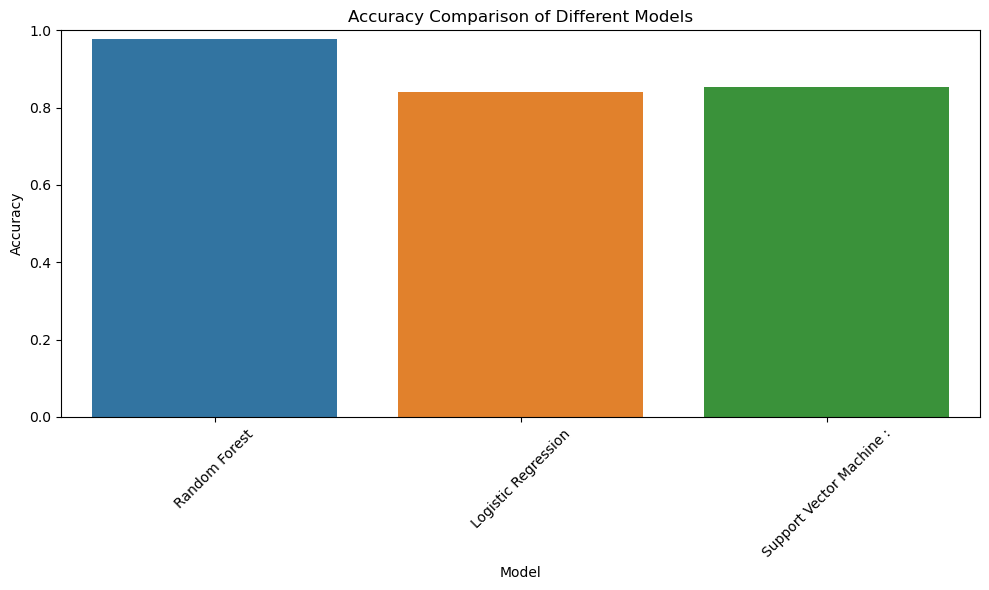

In [73]:
model = {'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Support Vector Machine :': SVC(kernel='linear'),
        }
results = {}
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()